# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a phase of the Data Science Cycle in which we can attain a deeper understanding of the data: understanding interactions, detection of atypical data, data distribution, data visualization, among others. 

In this session, we will do some EDA of the `diabetes` dataset. For now, as usual, let us import some libraries.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/Shareddrives/Equipo Concentración AI/Titanic"
!ls  # show current directory

/content/gdrive/Shareddrives/Equipo Concentración AI/Titanic
test.csv  train.csv


In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

In [ ]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Somes statistics and skewness of a distribution

One of the first things one could do is compute some statistics to comprehend a bit better the data. One good option is to use Panda's `describe` method:

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistics such as standar deviation, mean, quantiles, and others, are provided by this method. One interesting thing is that these quantities can already tell us something about how a variable is distributed. For instance, a measure of **skewness** is the following formula:

$$\frac{\mu-\nu}{\sigma}$$,

where $\nu$ is the median, also known as the second quantile. If this quantity is positive, this commonly indicates that the tail of the data is on the right side of the distribution; if said quantity is negative, then the tail is on the left side. If both $\mu$ and $\nu$ are equal, then we are dealing with a symmetric distribution.

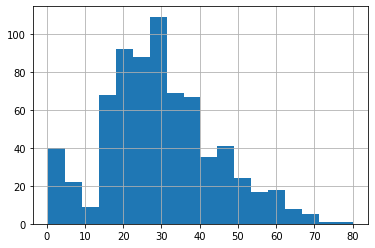

In [ ]:
titanic['Age'].hist(bins=18)

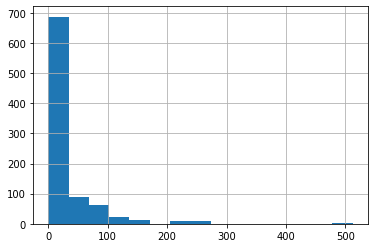

In [ ]:
titanic['Fare'].hist(bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc351ed6750>,
      dtype=object)

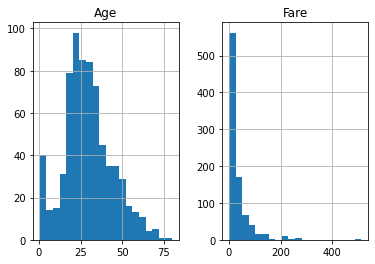

In [ ]:
titanic[['Age', 'Fare']].hist(bins=20)

In [ ]:
titanic.loc[titanic['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Filtro de mayores de edad

In [ ]:
titanic.loc[titanic['Age'] > 21]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


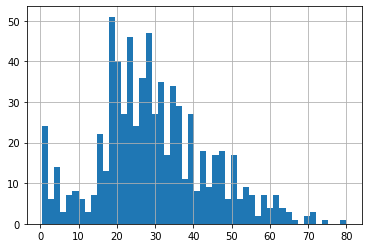

In [ ]:
titanic.loc[titanic['Age'] != 0, 'Age'].hist(bins=50)

Histograma de todas las edades

In [ ]:
boysSurvived = titanic.loc[(titanic['Survived'] == 1) & (titanic['Age'] < 21) & (titanic['Sex'] == 'male')]
girlsSurvived = titanic.loc[(titanic['Survived'] == 1) & (titanic['Sex'] == 'female')]

Ninos (nombres) que sobrevivieron y Ninas/Mujeres que sobrevivieron


In [ ]:
len(boysSurvived.index)


29

In [ ]:
len(girlsSurvived.index)

233

What does the method `describe` has to say about this?

In [ ]:
girlsSurvived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,233.000000,233.0,233.000000,197.000000,233.000000,233.000000,233.000000
mean,429.699571,1.0,1.918455,28.847716,0.515021,0.515021,51.938573
std,255.048296,0.0,0.834211,14.175073,0.737533,0.820527,64.102256
min,2.000000,1.0,1.000000,0.750000,0.000000,0.000000,7.225000
25%,238.000000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000
50%,400.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,636.000000,1.0,3.000000,38.000000,1.000000,1.000000,76.291700
max,888.000000,1.0,3.000000,63.000000,4.000000,5.000000,512.329200


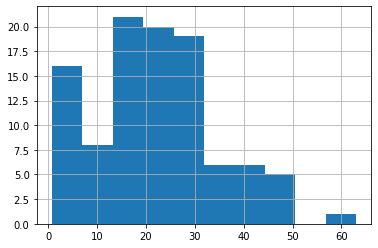

In [ ]:
titanic.loc[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 3), 'Age'].hist()

Histograma de la edad de las mujeres de tercera clase

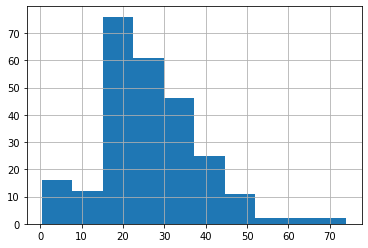

In [ ]:
titanic.loc[(titanic['Sex'] == 'male') & (titanic['Pclass'] == 3), 'Age'].hist()

Histograma de la edad de los hombres de tercera clase

## Scatter plots

Scatter plot de como se distribuye el precio del ticket con edad, nos dice sobre el poder adquisitivo por edad


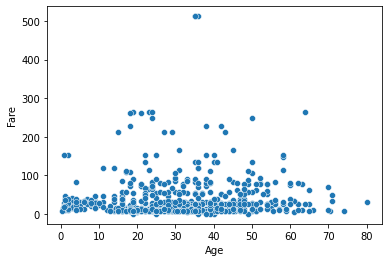

In [ ]:
sns.scatterplot(x='Age', y='Fare', data=titanic)

Esta muy variada, nosotros hubieramos esperado que entre mas alta la edad mas caro el ticket pero no parece ser eso


## Correlation

According to Wikipedia, "in the broadest sense, correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related." So, if two variables have any type of statistical association with each other, they can be correlated, either positively or negatively. In fact, let's take a look at the following table:

<img src="illuminati.jpg" alt="Drawing" style="width: 500px;"/>

What do you make of this? Are we able to conclude that epidemic and pandemics are caused by advances in technology that works with electromagnetic waves?

Well, of course not, these two variables might be correlated, but **correlation does not imply causation**. The moral of the story is that it is not wise to establish a cause-and-effect relationship based solely on correlation. Please, if you are reding this, just don't do it, this migh lead you to conclude absurd things.


Text(0.5, 1.0, 'Correlation matrix for the titanic dataset')

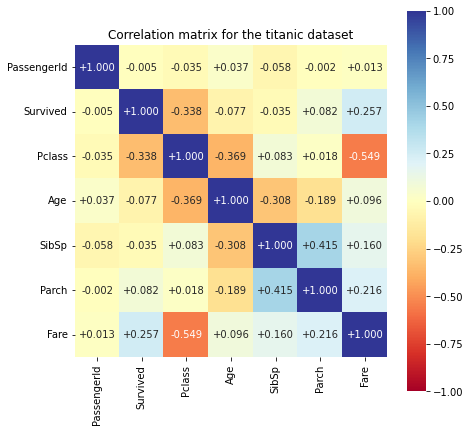

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(titanic.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the titanic dataset")

Lo que podemos observar es que la correlacion mas alta esta entre precio y clase que tiene muchisimo sentido ya que entre mas gastes mejor clase vas a tener. Otra que podemos observer es Edad con Clase que tambien nos habla del poder adquisitivo por edad


## Detecting Outliers

There are different techniques for detecting outliers, one of them being the **z-score**. This quantity is defined as follows:

$$z=\frac{x-\mu}{\sigma}$$,

where $x$ is some observation. 

If a variable follows a normal distribution, or close to normal, then this score is worth using. The following image shows why:

<img src="normal.png" alt="Drawing" style="width: 500px;"/>

The criterion for detecting outliers using the z-scores goes as this: if for a given observation $x$ the absolute value of its z-score is greater than 3, then x is an outlier.

The `BMI` variable seems to follow a close to normal distribution, does it have any outliers?

In [ ]:
sigma = titanic['Age'].std()
mu = titanic['Age'].mean()

In [ ]:
titanic.loc[titanic['Age'] > mu + 3*sigma]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


Observamos que la data sin outliers nos da una distribucion con un dominio mas pequeno


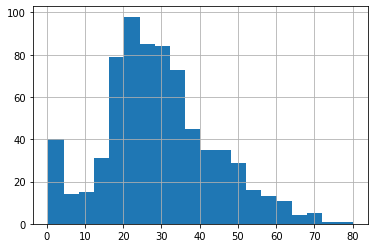

In [ ]:
titanic.loc[titanic['Age'] > mu - 2.7*sigma, 'Age'].hist(bins=20)

In [ ]:
titanic['z-score'] = (titanic['Age'] - mu) / sigma
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z-score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530005
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571430
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254646
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.364911
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.364911
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,-0.185807
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,-0.736524
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,-0.254646


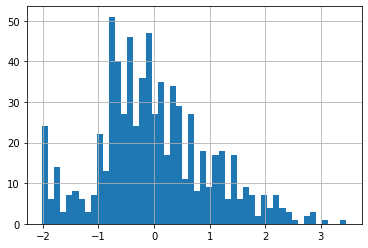

In [ ]:
titanic['z-score'].hist(bins=50)

### Boxplots

**Boxplot** are another technique that help us to understand the distribution of a variable and are useful for detecting outliers as well. The following image shows the "anatomy" of a boxplot (in Spanish!):

<img src="boxplot.png" alt="Drawing" style="width: 500px;"/>

Eberything looks pretty clear, except for maximum and minimum non-atypical values. These are calculated as follows:

$$\text{Maximum non-atypical value}=Q_3+\frac{3}{2}IQR$$
$$\text{Minimum non-atypical value}=Q_1-\frac{3}{2}IQR$$,

where $IQR=Q_3-Q_1$.

This story would not be complete without a real boxplot, right?

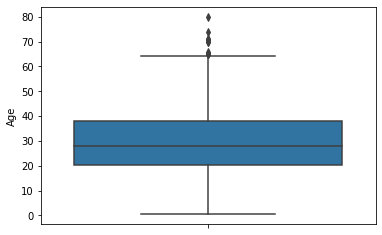

In [ ]:
sns.boxplot(y='Age', data=titanic)

## Barplots

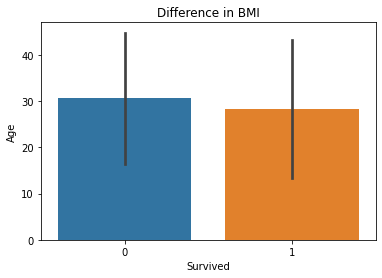

In [ ]:
sns.barplot(data=titanic, x='Survived', y='Age', ci='sd')
sns.set_palette('Set2')

plt.title('Difference in BMI')
plt.xlabel('Survived')
plt.ylabel('Age')

plt.show()

We can also use another variant of `barplot` known as `countplot`.

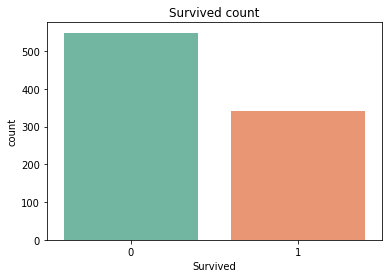

In [ ]:
sns.countplot(data=titanic, x='Survived')
sns.set_palette('Set2')

plt.title('Survived count')
plt.xlabel('Survived')

plt.show()

## Groupby

Another useful tool is the `groupy` method: if we wanna group our data by categories and then aggregate it with some function, this could help us to understand differences among several categories in our data.

In [ ]:
titanic.groupby(by='Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,z-score
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.063819
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,-0.093307


Data about who survived and who did not